In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


file = "/home/diya/personal/work/projects/bank fraud detection/bank_transactions_data.csv"
data = pd.read_csv(file)

#examining the first few rows of the csv file
print(data.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [12]:
#checking for missing values in the dataset
print("missing values:\n" , data.isnull().sum()) #counts the true values for the .isnull() function ine each column

#store the columns which contain only numbers in a seperate variavle
num_columns = data.select_dtypes(include=['float64', 'int64']).columns

missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [13]:
#from the "missing values:" we see that no column has any missing value and thus the dataset does not need any sort of "filling"
#converting "date" columns into date time format if in string format
date_columns = [col for col in data.columns if 'date' in col.lower()]
if date_columns:
    for col in date_columns:
        data[col] = pd.to_datetime(data[col])

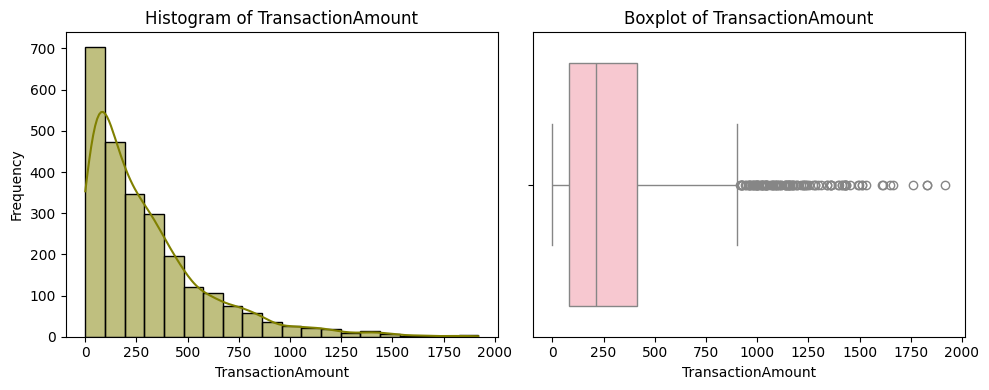

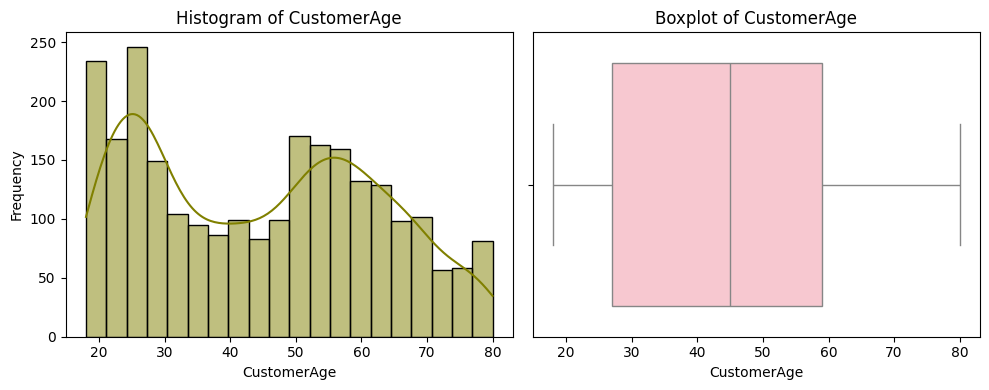

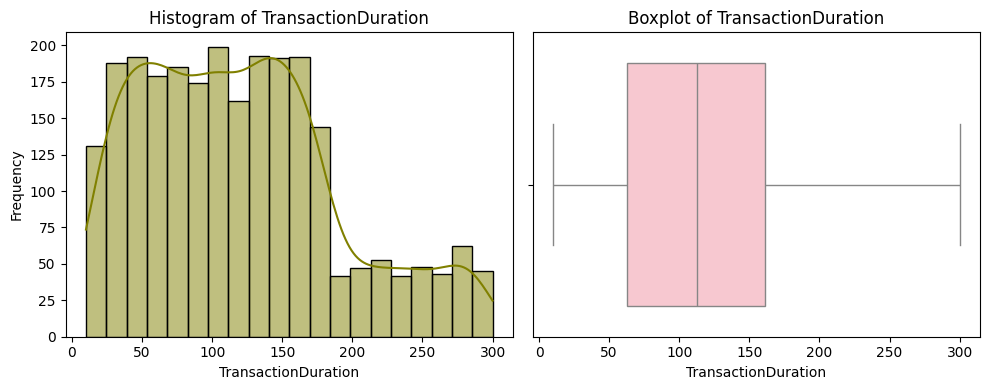

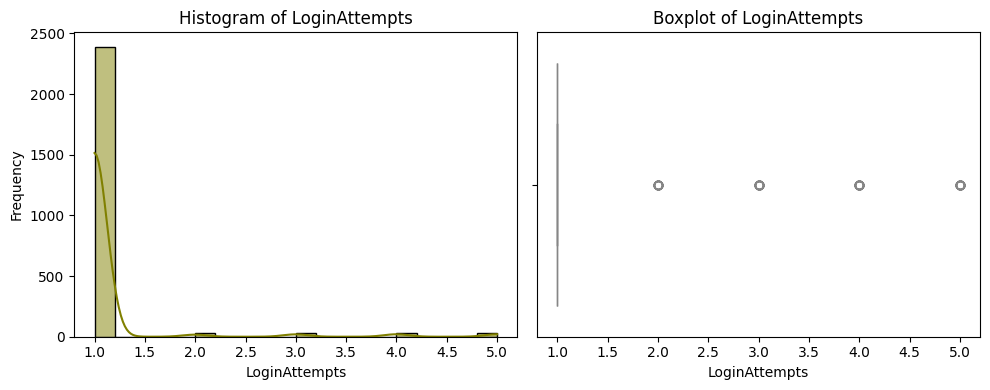

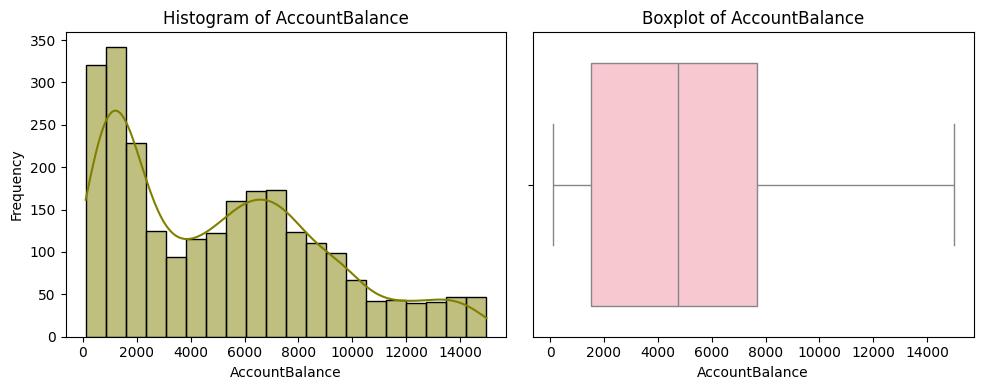

Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation'],
      dtype='object')


In [34]:
#understanding the distribution, variation and central tendency of a single feature at a time by doing univariate analysis

num_data = data.select_dtypes(include=['float64', 'int64'])

#seperating columns into numeric and categorical columns, numeric column is already initialized
cat_columns = data.select_dtypes(include=['object', 'category']).columns

#comparision between histograms and box plots for numeric columns
for col in num_columns:
    plt.figure(figsize=(10,4))
    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, bins=20, color='olive', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color='pink')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

print(cat_columns)

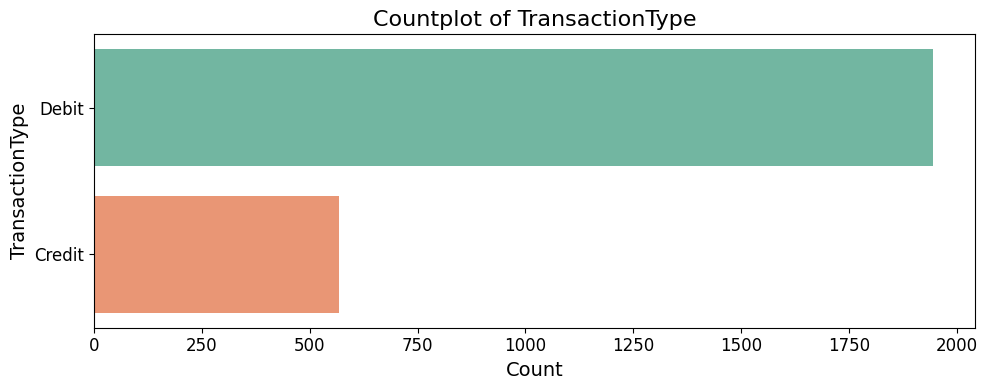

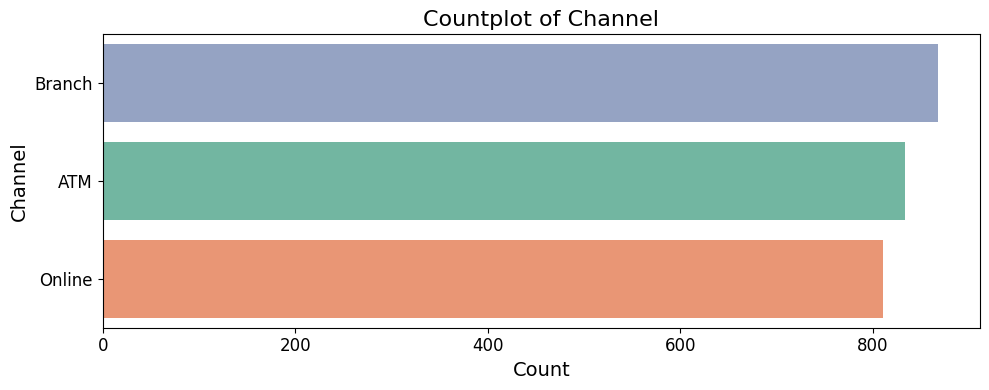

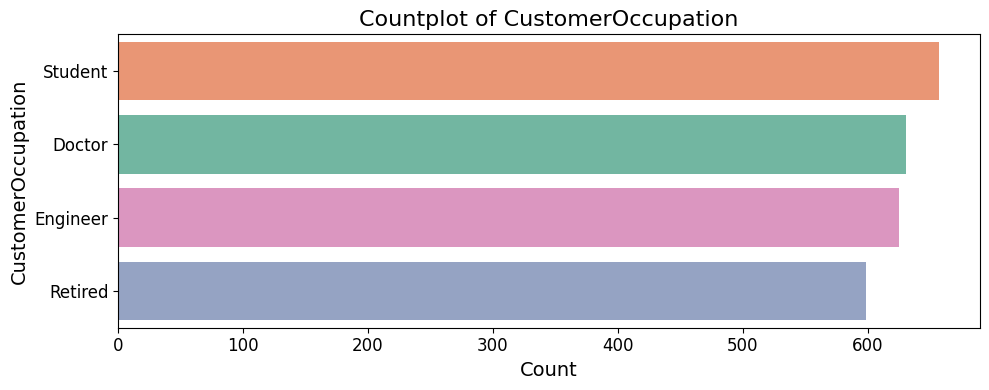

In [33]:
#countplot for  specific categorical columns
specific_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in specific_columns:
    plt.figure(figsize=(10, 4))
    value_counts = data[col].value_counts()
    sns.countplot(y=data[col], order=value_counts.index, hue=data[col], palette='Set2')
    plt.title(f'Countplot of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


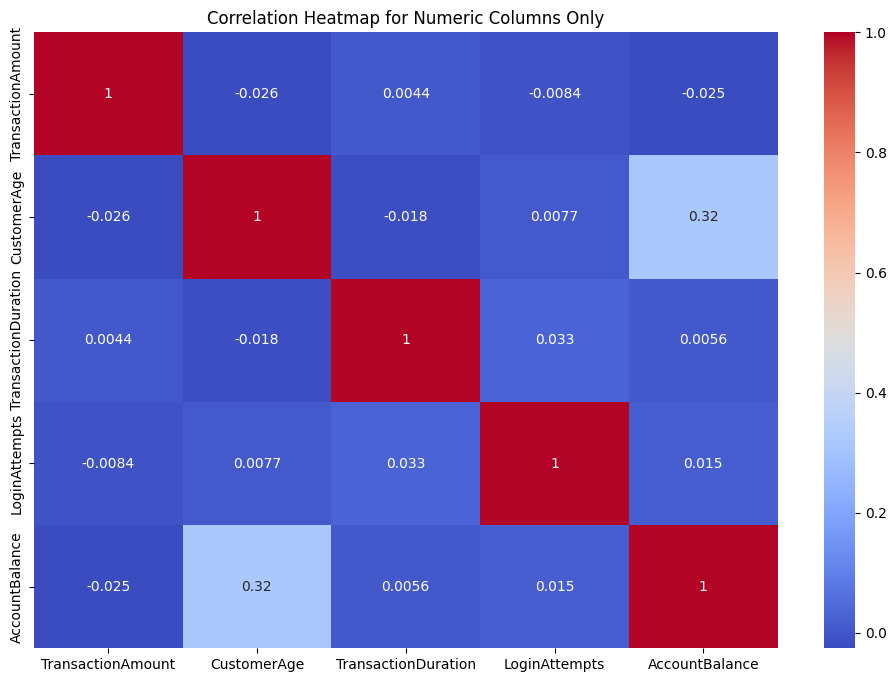

<Figure size 1200x800 with 0 Axes>

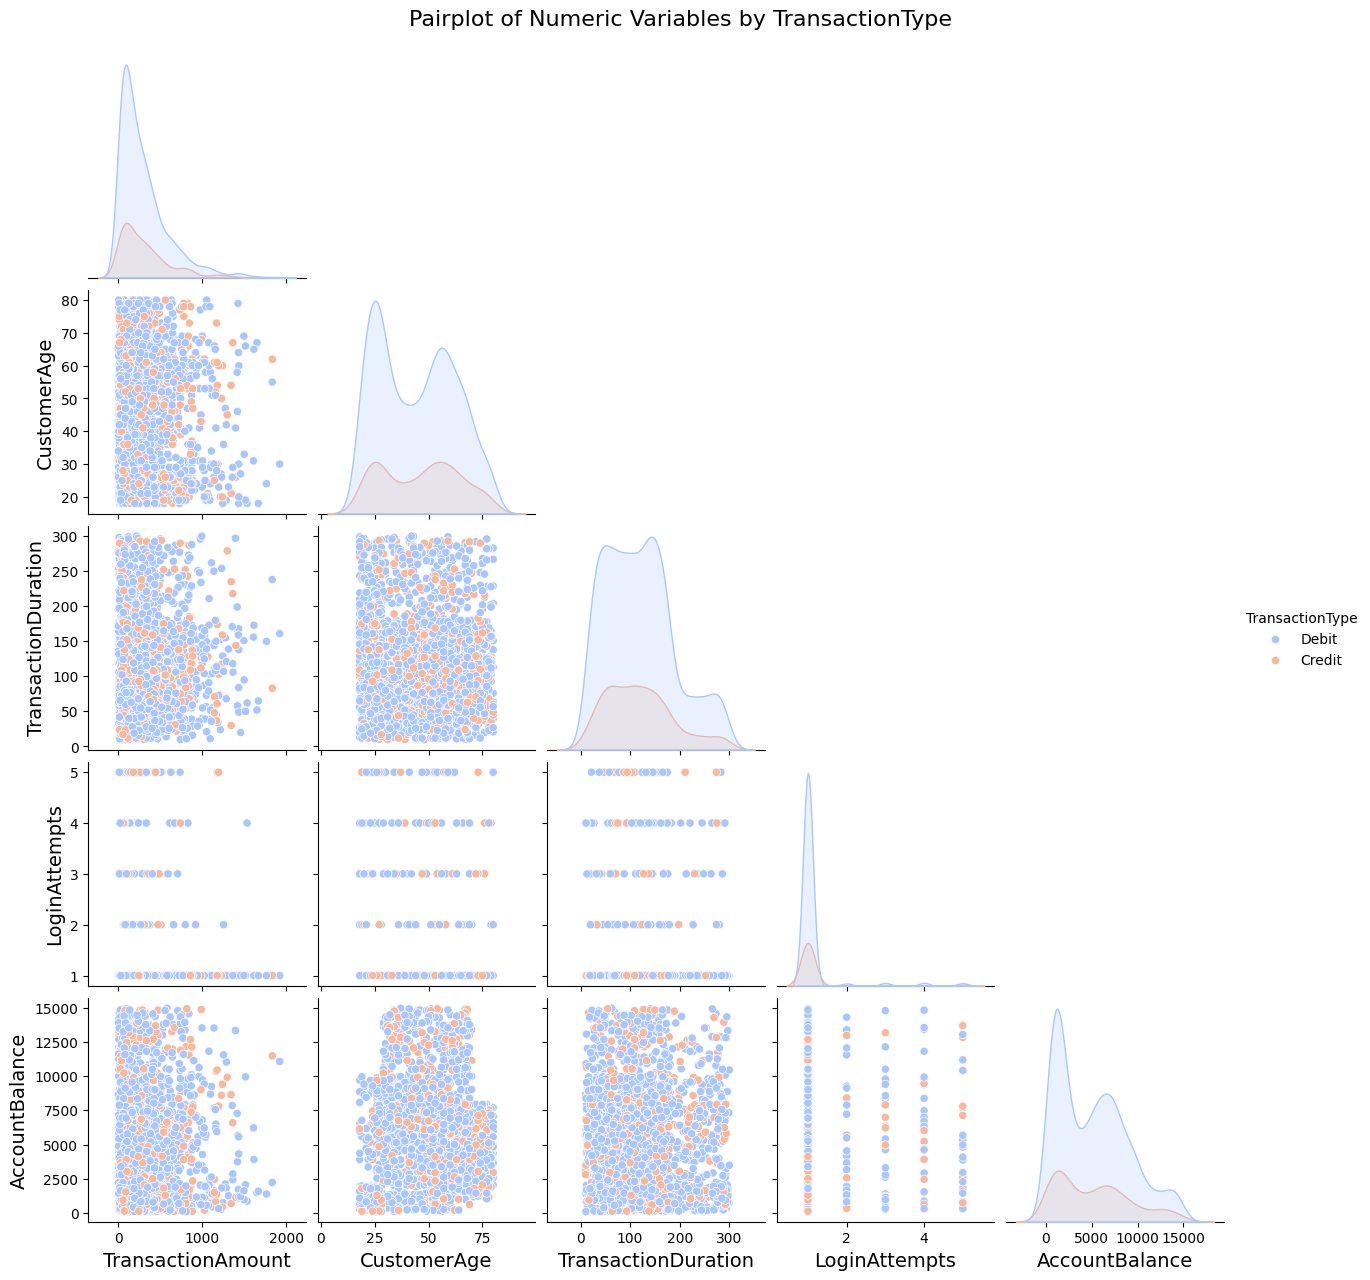

In [62]:
#bivariate and multivariate analysis

#correlation matrix for the numeric columns
correlation_mat = num_data.corr()
print("Correlation Matrix:")
print(correlation_mat)

#heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(correlation_mat, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns Only')
plt.show()

#multivariate paiplot of numeric variables coloured by transaction type
plt.figure(figsize=(12,8))
g = sns.pairplot(data, vars=num_columns, hue='TransactionType', palette='coolwarm', corner=True, diag_kind='kde')
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)
        # ax.tick_params(labelsize=12) 

g.figure.suptitle('Pairplot of Numeric Variables by TransactionType', fontsize=16, y=1.02)
plt.show()
